In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sc
import matplotlib.pyplot as pl
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [12]:
data = pd.read_csv('/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/Merged.csv')
data.drop('Unnamed: 0', 1, inplace=True)
data = data.query('Year not in [2016, 2011, 2012]')
print data.shape
data.columns

(232, 55)


Index([u'PrecinctYear', u'Precinct', u'Year', u'Taxis', u'Flyers', u'Seniors',
       u'Outreach', u'HandsOn', u'Edu_Total', u'Backing Unsafely',
       u'Brake Lights (Defect.or Improper)', u'Bus Lane, Driving in',
       u'Cell Phone', u'Commercial Veh on Pkwy', u'Defective Brakes',
       u'Disobey Steady Red Signal', u'Disobey Traffic Control Device',
       u'Equipment (Other)', u'Fail to Keep Right', u'Fail to Signal',
       u'Following Too Closely', u'Headlights (Defect. or Improper)',
       u'Improper Lights', u'Improper Passing', u'Improper Turn',
       u'Improper/Missing Plates', u'Not Giving R of W to Pedes.',
       u'Not Giving R of W to Veh.', u'One Way Street', u'Other Movers',
       u'Pavement Markings', u'Safety Belt', u'School Bus, Passing Stopped',
       u'Speeding', u'Spillback', u'Tinted Windows', u'Truck Routes',
       u'U-Turn', u'Uninspected', u'Uninsured', u'Unlicensed Operator',
       u'Unregistered', u'P12', u'P123', u'Traf_Total',
       u'Neigh_Slow_

### Has There Been a Decrease in Injuries or Deaths Post Vision Zero?

In [33]:
preVZ = data.query('Year == 2013')
postVZ = data.query('Year in [2014, 2015]')

personsinjured = sc.ttest_ind(preVZ['NUMBER OF PERSONS INJURED'], postVZ['NUMBER OF PERSONS INJURED'])
personskilled = sc.ttest_ind(preVZ['NUMBER OF PERSONS KILLED'], postVZ['NUMBER OF PERSONS KILLED'])
pedinjured = sc.ttest_ind(preVZ['NUMBER OF PEDESTRIANS INJURED'], postVZ['NUMBER OF PEDESTRIANS INJURED'])
pedkilled = sc.ttest_ind(preVZ['NUMBER OF PEDESTRIANS KILLED'], postVZ['NUMBER OF PEDESTRIANS KILLED'])
cycinjured = sc.ttest_ind(preVZ['NUMBER OF CYCLIST INJURED'], postVZ['NUMBER OF CYCLIST INJURED'])
cyckilled = sc.ttest_ind(preVZ['NUMBER OF CYCLIST KILLED'], postVZ['NUMBER OF CYCLIST KILLED'])
motoinjured = sc.ttest_ind(preVZ['NUMBER OF MOTORIST INJURED'], postVZ['NUMBER OF MOTORIST INJURED'])
motokilled = sc.ttest_ind(preVZ['NUMBER OF MOTORIST KILLED'], postVZ['NUMBER OF MOTORIST KILLED'])


print "NUMBER OF PERSONS INJURED: ", personsinjured
print "NUMBER OF PERSONS KILLED: ", personskilled
print "NUMBER OF PEDESTRIANS INJURED: ", pedinjured
print "NUMBER OF PEDESTRIANS KILLED: ", pedkilled
print "NUMBER OF CYCLIST INJURED: ", cycinjured
print "NUMBER OF CYCLIST KILLED: ", cyckilled
print "NUMBER OF MOTORIST INJURED: ", motoinjured
print "NUMBER OF MOTORIST KILLED: ", motokilled

NUMBER OF PERSONS INJURED:  Ttest_indResult(statistic=0.23101956643402979, pvalue=0.81750497560773017)
NUMBER OF PERSONS KILLED:  Ttest_indResult(statistic=0.23516470614590321, pvalue=0.81429013864083288)
NUMBER OF PEDESTRIANS INJURED:  Ttest_indResult(statistic=0.46131365642000755, pvalue=0.64500954864969429)
NUMBER OF PEDESTRIANS KILLED:  Ttest_indResult(statistic=0.95293690270452214, pvalue=0.34162243044674601)
NUMBER OF CYCLIST INJURED:  Ttest_indResult(statistic=-0.070766668061999591, pvalue=0.9436449532053206)
NUMBER OF CYCLIST KILLED:  Ttest_indResult(statistic=-1.7737246557364159, pvalue=0.077431852135491849)
NUMBER OF MOTORIST INJURED:  Ttest_indResult(statistic=0.1959369519726841, pvalue=0.84483251551584881)
NUMBER OF MOTORIST KILLED:  Ttest_indResult(statistic=-0.095334630338479096, pvalue=0.92413204485782252)


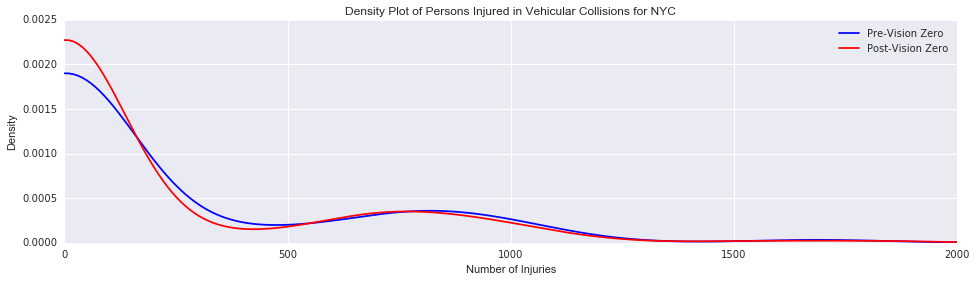

In [70]:
density = sc.gaussian_kde(preVZ['NUMBER OF PERSONS INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF PERSONS INJURED'])
xs = np.linspace(0, 2000, 200)


fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Persons Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [75]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF PERSONS INJURED'], 
                       preVZ['NUMBER OF PERSONS INJURED'])
print (ks)

Ks_2sampResult(statistic=0.046250523669878474, pvalue=0.99984864178598298)


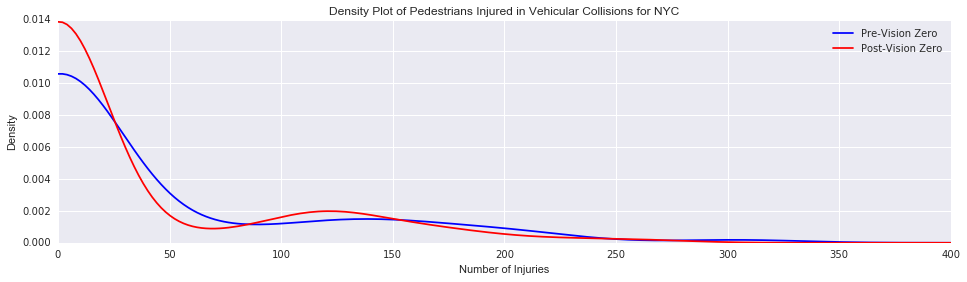

In [73]:
density = sc.gaussian_kde(preVZ['NUMBER OF PEDESTRIANS INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF PEDESTRIANS INJURED'])
xs = np.linspace(0, 400, 200)

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Pedestrians Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [74]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF PEDESTRIANS INJURED'], 
                       preVZ['NUMBER OF PEDESTRIANS INJURED'])
print (ks)

Ks_2sampResult(statistic=0.045999162128194437, pvalue=0.99986480088163698)


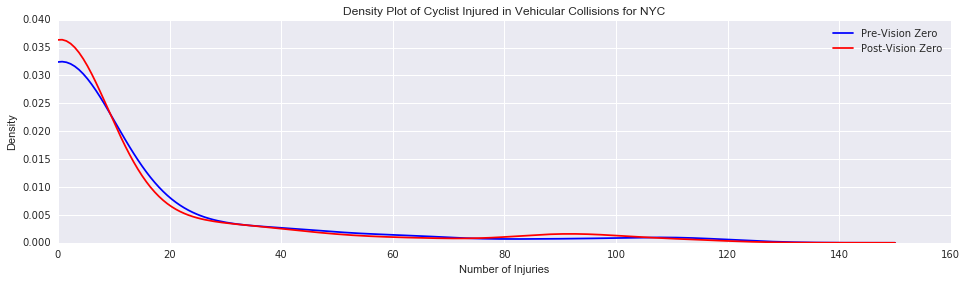

In [77]:
density = sc.gaussian_kde(preVZ['NUMBER OF CYCLIST INJURED'])
density1 = sc.gaussian_kde(postVZ['NUMBER OF CYCLIST INJURED'])
xs = np.linspace(0, 150, 200)

fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.plot(xs, density(xs), c='b', label='Pre-Vision Zero')
ax1.plot(xs, density1(xs), c='r', label='Post-Vision Zero')
ax1.set_title('Density Plot of Cyclist Injured in Vehicular Collisions for NYC')
ax1.set_ylabel('Density')
ax1.set_xlabel('Number of Injuries')
ax1.legend()

In [79]:
ks = sc.stats.ks_2samp(postVZ['NUMBER OF CYCLIST INJURED'], 
                       preVZ['NUMBER OF CYCLIST INJURED'])
print (ks)

Ks_2sampResult(statistic=0.025555090071219144, pvalue=0.99999999999999412)


### Does Ticketing Correlate with Injuries?
#### Priority 1, 2, & 3. 

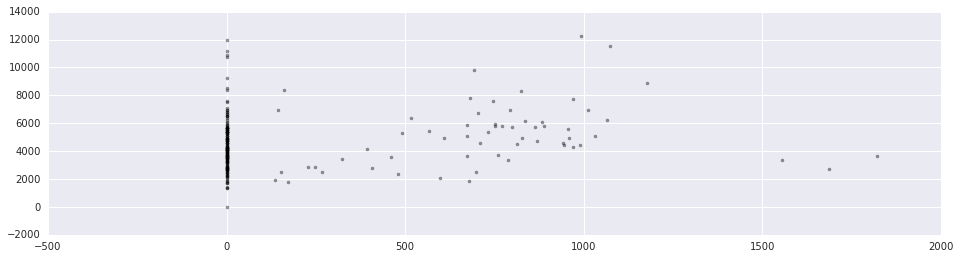

In [81]:
# results1 = smf.ols('LogSiteEUITotal ~ LogUnitsTotal', data = bldnrg).fit()

fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.scatter(data['NUMBER OF PERSONS INJURED'], data['P123'],
           alpha=0.4, s = 10, c = 'k')
# ax1.axis([0.5, 4.5, 2, 14])
# ax1.plot(bldnrg['LogUnitsTotal'], results1.predict(), c = 'r', 
#          label = 'OLS Regression')
# ax1.set_xlabel('Log Number of Units')
# ax1.set_ylabel('Log Total Energy Consumption (kBtu)')
# ax1.set_title('Linear Model of Log Energy Consumption by Log Number of Units')
# ax1.text(0.5, -1.5, 'Figure 4. Log energy consumption by log number of units scatterplot illustrative\
# of the relationship between both variables. Here, the linear relationship \nis presented through an OLS Regression.')
# ax1.legend()

In [88]:
data['NUMBER OF PERSONS KILLED'].sum()

250

In [91]:
coll = pd.read_csv('/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/VisionZero_Collisions.csv')
coll.head()
coll['NUMBER OF PERSONS KILLED'].sum()

658